In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import json


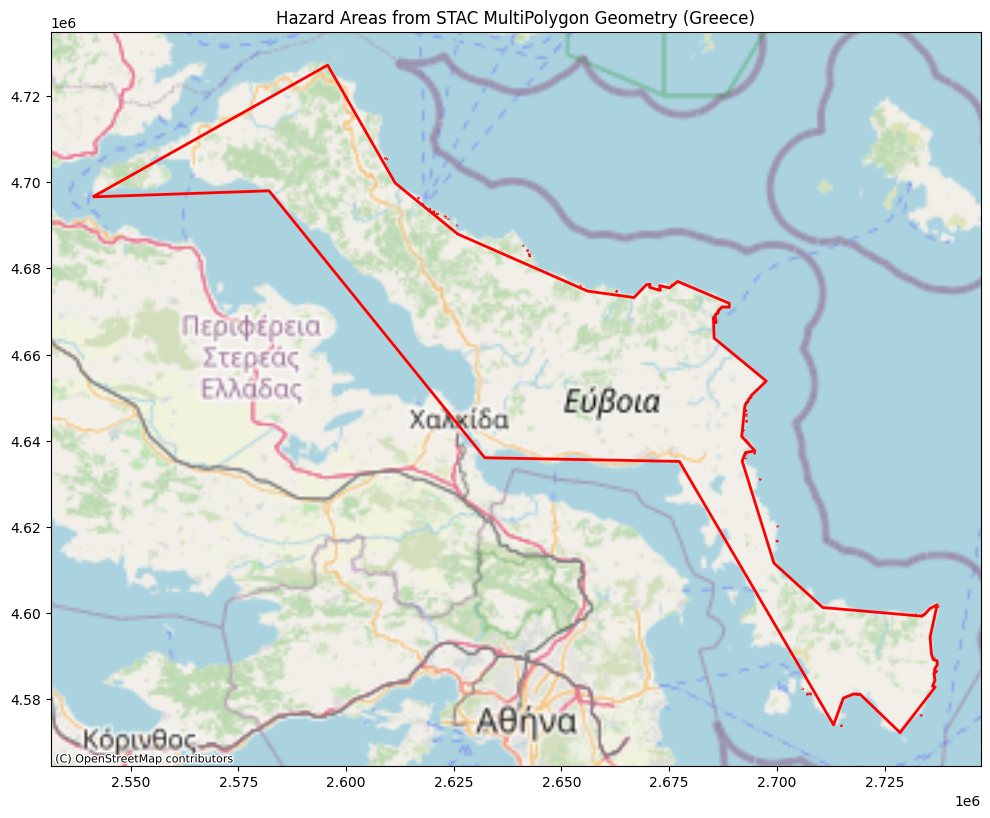

In [6]:

# Load your STAC GeoJSON file
with open('stac_api_response.json', 'r') as f:
    stac_data = json.load(f)

# Create GeoDataFrame from features
gdf = gpd.GeoDataFrame.from_features(stac_data['features'])

# Set CRS to EPSG:4326 (lat/lon), then convert to Web Mercator (EPSG:3857) for contextily
gdf = gdf.set_crs(epsg=4326).to_crs(epsg=3857)

# Plot polygons with map background
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf.plot(edgecolor='red', facecolor='none', linewidth=2, ax=ax)
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik, zoom=8)

ax.set_title("Hazard Areas from STAC MultiPolygon Geometry (Greece)")
plt.show()


In [8]:
import folium

# Create a map centered on Greece
m = folium.Map(location=[39.0, 22.0], zoom_start=6)

# Function to style the features based on severity_value
def style_function(feature):
    severity = feature['properties'].get('severity_value', 0)
    if severity > 0.5:
        color = 'red'
    elif severity > 0.3:
        color = 'orange'
    else:
        color = 'yellow'
    return {
        'fillColor': color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    }

# Add GeoJson layer
folium.GeoJson(
    stac_data,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['title'])
).add_to(m)

# Save the map to HTML file
m.save('hazard_map.html')
print("Folium map created and saved to hazard_map.html")

# Display the map
m

Folium map created and saved to hazard_map.html


In [4]:
print(gdf.columns)
print(gdf.head())

Index(['geometry', 'roles', 'title', 'source', 'datetime', 'description',
       'end_datetime', 'monty:etl_id', 'monty:corr_id', 'start_datetime',
       'monty:hazard_codes', 'monty:country_codes', 'monty:hazard_detail',
       'monty:episode_number'],
      dtype='object')
                                            geometry             roles  \
0  MULTIPOLYGON (((11428716.667 664972.737, 11428...  [source, hazard]   

               title  source              datetime  \
0  Flood in Malaysia  GLOFAS  2024-12-29T01:00:00Z   

                                         description  \
0  Green Flood in Malaysia from: 29 Dec 2024 01 t...   

                end_datetime                          monty:etl_id  \
0  2024-12-31T01:00:00+00:00  5251a423-c0b5-4de9-9896-996bd99a3183   

                         monty:corr_id             start_datetime  \
0  20241229-MYS-NAT-HYD-FLO-FLO-1-GCDB  2024-12-29T01:00:00+00:00   

  monty:hazard_codes monty:country_codes  \
0               [FL]        

In [9]:
print("Number of features:", len(gdf))
print("Unique titles:", gdf['title'].unique())
print("Columns with severity:", [col for col in gdf.columns if 'severity' in col])

Number of features: 1
Unique titles: ['Flood in Greece']
Columns with severity: []


In [10]:
# Check the original CRS of the GeoDataFrame
print("Original CRS:", gdf.crs)

# Check coordinate ranges
print("Bounds:", gdf.total_bounds)

# Check if coordinates look like lat/lon
coords = gdf.geometry.iloc[0].exterior.coords[0] if gdf.geometry.iloc[0].geom_type == 'Polygon' else gdf.geometry.iloc[0].geoms[0].exterior.coords[0]
print("Sample coordinates:", coords)

Original CRS: EPSG:3857
Bounds: [2541259.47799889 4572258.12917085 2737438.1394504  4727168.57781712]
Sample coordinates: (2541259.4779988904, 4696598.754824101)
